In [1]:
import nflfastpy as npy
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib.patches import Polygon
import pandas as pd
import numpy as np
import urllib
from PIL import Image

### Load team color and logo data

In [2]:
team_logo_df = npy.load_team_logo_data()

### Load 2019 play-by-play data

In [3]:
df_2019 = npy.load_pbp_data(2019)
df_2021 = npy.load_pbp_data(2021)

### Get Jimmy Garoppolo stats

In [4]:
df_jimmy_2019 = df_2019[
    ((df_2019["passer_player_name"] == "J.Garoppolo") |
    (df_2019["rusher_player_name"] == "J.Garoppolo") |
    (df_2019["receiver_player_name"] == "J.Garoppolo")) &
    (df_2019["two_point_attempt"] == 0) &
    (df_2019["week"] <= 17)
].copy()

df_jimmy_2021 = df_2021[
    ((df_2021["passer_player_name"] == "J.Garoppolo") |
    (df_2021["rusher_player_name"] == "J.Garoppolo") |
    (df_2021["receiver_player_name"] == "J.Garoppolo")) &
    (df_2021["two_point_attempt"] == 0) &
    (df_2021["week"] <= 17)
].copy()

In [5]:
df_jimmy_2019

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2379,170,2019_01_SF_TB,2019090811,TB,SF,REG,1,SF,away,TB,...,0,1,1.637689,0.571857,3.312729,2.0,0.994827,0.384211,0.695791,30.420947
2382,263,2019_01_SF_TB,2019090811,TB,SF,REG,1,SF,away,TB,...,0,1,-0.711068,NaN,NaN,NaN,NaN,NaN,0.779658,22.034174
2383,285,2019_01_SF_TB,2019090811,TB,SF,REG,1,SF,away,TB,...,0,1,-0.228778,0.860401,9.568264,9.0,0.169492,0.151952,0.937323,6.267726
2399,682,2019_01_SF_TB,2019090811,TB,SF,REG,1,SF,away,TB,...,0,1,0.436028,0.533452,4.346950,3.0,0.995440,0.302961,0.465624,53.437573
2400,706,2019_01_SF_TB,2019090811,TB,SF,REG,1,SF,away,TB,...,0,1,-0.043633,1.686258,9.799504,8.0,0.600090,0.600090,0.389146,61.085418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45664,2454,2019_17_SF_SEA,2019122915,SEA,SF,REG,17,SF,away,SEA,...,0,1,2.653116,0.733874,3.745725,2.0,0.995127,0.462860,0.745890,25.410974
45689,3035,2019_17_SF_SEA,2019122915,SEA,SF,REG,17,SF,away,SEA,...,1,1,1.048331,0.929011,7.592291,6.0,0.563803,0.221335,0.370403,62.959650
45692,3113,2019_17_SF_SEA,2019122915,SEA,SF,REG,17,SF,away,SEA,...,1,1,2.102851,0.315333,3.586194,2.0,1.000000,1.000000,0.913339,8.666146
45709,3495,2019_17_SF_SEA,2019122915,SEA,SF,REG,17,SF,away,SEA,...,0,1,0.442951,0.510000,9.424435,8.0,0.110324,0.064376,0.745644,25.435597


In [6]:
df_jimmy_2021

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2725,208,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,-5.752974,NaN,NaN,NaN,NaN,NaN,0.493025,-49.302533
2734,417,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,1.468399,0.330322,4.721611,2.0,0.996497,0.998313,0.249677,75.032306
2737,487,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,1,1,1.767570,1.572896,2.614494,2.0,0.652950,0.652950,0.972281,2.771866
2759,1026,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,2.235091,0.363803,5.511636,3.0,1.000000,1.000000,0.718925,28.107512
2760,1054,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,0.554130,0.430087,3.992669,2.0,0.982975,0.277121,0.496457,50.354278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29257,2203,2021_11_SF_JAX,2021112104,JAX,SF,REG,11,SF,away,JAX,...,0,0,2.627463,NaN,NaN,NaN,NaN,NaN,0.388583,61.141652
29270,2484,2021_11_SF_JAX,2021112104,JAX,SF,REG,11,SF,away,JAX,...,0,0,-1.284493,0.467435,6.636400,3.0,1.000000,1.000000,0.945506,5.449396
29291,2974,2021_11_SF_JAX,2021112104,JAX,SF,REG,11,SF,away,JAX,...,0,0,-1.910491,NaN,NaN,NaN,NaN,NaN,0.836129,16.387069
29293,3025,2021_11_SF_JAX,2021112104,JAX,SF,REG,11,SF,away,JAX,...,0,0,0.812256,0.545008,4.144714,2.0,0.756633,0.242803,0.228720,77.127984


### Total passing yards

In [7]:
print(f"2019 - Jimmy Garoppolo passing yards: {df_jimmy_2019['passing_yards'].sum()}")
print(f"2021 - Jimmy Garoppolo passing yards: {df_jimmy_2021['passing_yards'].sum()}")

2019 - Jimmy Garoppolo passing yards: 3978.0
2021 - Jimmy Garoppolo passing yards: 2112.0


In [8]:
df_jimmy_agg_2019 = df_jimmy_2019.groupby(["week"], as_index=False).agg(
    {
        "complete_pass": "sum",
        "pass_attempt": "sum", 
        "passing_yards": "sum",
        "sack": "sum",
        "pass_touchdown": "sum"
    }
)
df_jimmy_agg_2019["pass_attempt"] = df_jimmy_agg_2019["pass_attempt"] - df_jimmy_agg_2019["sack"]

df_jimmy_agg_2021 = df_jimmy_2021.groupby(["week"], as_index=False).agg(
    {
        "complete_pass": "sum",
        "pass_attempt": "sum", 
        "passing_yards": "sum",
        "sack": "sum",
        "pass_touchdown": "sum"
    }
)
df_jimmy_agg_2021["pass_attempt"] = df_jimmy_agg_2021["pass_attempt"] - df_jimmy_agg_2021["sack"]

In [9]:
df_jimmy_agg_2019

,week,complete_pass,pass_attempt,passing_yards,sack,pass_touchdown
0,1,18.0,27.0,166.0,1.0,1.0
1,2,17.0,25.0,296.0,0.0,3.0
2,3,23.0,32.0,277.0,1.0,1.0
3,5,20.0,29.0,181.0,2.0,2.0
4,6,24.0,33.0,243.0,2.0,0.0
5,7,12.0,21.0,151.0,2.0,0.0
6,8,18.0,22.0,175.0,3.0,2.0
7,9,28.0,37.0,317.0,1.0,4.0
8,10,24.0,46.0,248.0,5.0,1.0
9,11,34.0,45.0,424.0,2.0,4.0


In [10]:
df_jimmy_agg_2021

,week,complete_pass,pass_attempt,passing_yards,sack,pass_touchdown
0,1,17.0,25.0,314.0,1.0,1.0
1,2,22.0,30.0,189.0,0.0,1.0
2,3,25.0,40.0,257.0,4.0,2.0
3,4,14.0,23.0,165.0,1.0,1.0
4,7,16.0,27.0,181.0,2.0,1.0
5,8,17.0,28.0,322.0,0.0,0.0
6,9,28.0,40.0,326.0,5.0,2.0
7,10,15.0,19.0,182.0,1.0,2.0
8,11,16.0,22.0,176.0,2.0,2.0


In [11]:
df_passes_2019 = (
    df_jimmy_2019[(df_jimmy_2019["pass_attempt"] == 1) & (df_jimmy_2019["sack"] == 0)]
    [["pass_attempt", "complete_pass", "interception", "pass_location", "air_yards", "yards_gained"]]
    .copy()
)

df_passes_2021 = (
    df_jimmy_2021[(df_jimmy_2021["pass_attempt"] == 1) & (df_jimmy_2021["sack"] == 0)]
    [["pass_attempt", "complete_pass", "interception", "pass_location", "air_yards", "yards_gained"]]
    .copy()
)

In [12]:
df_passes_2019

,pass_attempt,complete_pass,interception,pass_location,air_yards,yards_gained
2379,1.0,1.0,0.0,left,6.0,19.0
2382,1.0,0.0,0.0,left,18.0,0.0
2383,1.0,1.0,0.0,right,-3.0,7.0
2399,1.0,1.0,0.0,middle,5.0,7.0
2400,1.0,1.0,0.0,middle,-4.0,2.0
...,...,...,...,...,...,...
45662,1.0,1.0,0.0,right,29.0,49.0
45664,1.0,1.0,0.0,middle,6.0,24.0
45689,1.0,1.0,0.0,right,-1.0,16.0
45692,1.0,1.0,0.0,right,18.0,21.0


In [13]:
df_passes_2021

,pass_attempt,complete_pass,interception,pass_location,air_yards,yards_gained
2734,1.0,1.0,0.0,right,3.0,23.0
2737,1.0,1.0,0.0,left,5.0,7.0
2759,1.0,1.0,0.0,middle,18.0,29.0
2760,1.0,1.0,0.0,left,5.0,8.0
2774,1.0,1.0,0.0,left,5.0,7.0
...,...,...,...,...,...,...
29255,1.0,1.0,0.0,left,2.0,4.0
29256,1.0,0.0,0.0,right,1.0,0.0
29257,1.0,1.0,0.0,middle,1.0,1.0
29270,1.0,0.0,0.0,left,21.0,0.0


In [14]:
df_passes_2019["dist"] = df_passes_2019["air_yards"].apply(
    lambda x: "0 - 10 Yards" if x <= 10 else "10 - 20 Yards" if x <= 20 else "20+ Yards"
)

df_passes_2021["dist"] = df_passes_2021["air_yards"].apply(
    lambda x: "0 - 10 Yards" if x <= 10 else "10 - 20 Yards" if x <= 20 else "20+ Yards"
)

In [15]:
df_passes_2019

,pass_attempt,complete_pass,interception,pass_location,air_yards,yards_gained,dist
2379,1.0,1.0,0.0,left,6.0,19.0,0 - 10 Yards
2382,1.0,0.0,0.0,left,18.0,0.0,10 - 20 Yards
2383,1.0,1.0,0.0,right,-3.0,7.0,0 - 10 Yards
2399,1.0,1.0,0.0,middle,5.0,7.0,0 - 10 Yards
2400,1.0,1.0,0.0,middle,-4.0,2.0,0 - 10 Yards
...,...,...,...,...,...,...,...
45662,1.0,1.0,0.0,right,29.0,49.0,20+ Yards
45664,1.0,1.0,0.0,middle,6.0,24.0,0 - 10 Yards
45689,1.0,1.0,0.0,right,-1.0,16.0,0 - 10 Yards
45692,1.0,1.0,0.0,right,18.0,21.0,10 - 20 Yards


In [16]:
df_passes_2021

,pass_attempt,complete_pass,interception,pass_location,air_yards,yards_gained,dist
2734,1.0,1.0,0.0,right,3.0,23.0,0 - 10 Yards
2737,1.0,1.0,0.0,left,5.0,7.0,0 - 10 Yards
2759,1.0,1.0,0.0,middle,18.0,29.0,10 - 20 Yards
2760,1.0,1.0,0.0,left,5.0,8.0,0 - 10 Yards
2774,1.0,1.0,0.0,left,5.0,7.0,0 - 10 Yards
...,...,...,...,...,...,...,...
29255,1.0,1.0,0.0,left,2.0,4.0,0 - 10 Yards
29256,1.0,0.0,0.0,right,1.0,0.0,0 - 10 Yards
29257,1.0,1.0,0.0,middle,1.0,1.0,0 - 10 Yards
29270,1.0,0.0,0.0,left,21.0,0.0,20+ Yards


In [17]:
df_loc_agg_2019 = (
    df_passes_2019.groupby(["pass_location", "dist"], as_index=False)
    .agg(
        {
            "pass_attempt": "size", 
            "complete_pass": "sum", 
            "interception": "sum",
            "air_yards": "sum", 
            "yards_gained": "sum"
        }
    )
)
df_loc_agg_2019["completion_percentage"] = (df_loc_agg_2019["complete_pass"] / df_loc_agg_2019["pass_attempt"]).round(2)
df_loc_agg_2019["ypa"] = (df_loc_agg_2019["yards_gained"] / df_loc_agg_2019["pass_attempt"]).round(2)

df_loc_agg_2021 = (
    df_passes_2021.groupby(["pass_location", "dist"], as_index=False)
    .agg(
        {
            "pass_attempt": "size", 
            "complete_pass": "sum", 
            "interception": "sum",
            "air_yards": "sum", 
            "yards_gained": "sum"
        }
    )
)
df_loc_agg_2021["completion_percentage"] = (df_loc_agg_2021["complete_pass"] / df_loc_agg_2021["pass_attempt"]).round(2)
df_loc_agg_2021["ypa"] = (df_loc_agg_2021["yards_gained"] / df_loc_agg_2021["pass_attempt"]).round(2)

In [18]:
df_loc_agg_2019

,pass_location,dist,pass_attempt,complete_pass,interception,air_yards,yards_gained,completion_percentage,ypa
0,left,0 - 10 Yards,108,88.0,3.0,166.0,844.0,0.81,7.81
1,left,10 - 20 Yards,26,14.0,0.0,376.0,260.0,0.54,10.00
2,left,20+ Yards,14,8.0,3.0,345.0,234.0,0.57,16.71
3,middle,0 - 10 Yards,88,63.0,1.0,387.0,688.0,0.72,7.82
4,middle,10 - 20 Yards,39,30.0,1.0,528.0,550.0,0.77,14.10
5,middle,20+ Yards,4,4.0,0.0,146.0,204.0,1.00,51.00
6,right,0 - 10 Yards,145,104.0,3.0,284.0,744.0,0.72,5.13
7,right,10 - 20 Yards,41,13.0,2.0,621.0,300.0,0.32,7.32
8,right,20+ Yards,9,5.0,0.0,255.0,154.0,0.56,17.11


In [19]:
df_loc_agg_2021

,pass_location,dist,pass_attempt,complete_pass,interception,air_yards,yards_gained,completion_percentage,ypa
0,left,0 - 10 Yards,67,48.0,1.0,164.0,432.0,0.72,6.45
1,left,10 - 20 Yards,11,7.0,0.0,166.0,156.0,0.64,14.18
2,left,20+ Yards,7,1.0,0.0,182.0,29.0,0.14,4.14
3,middle,0 - 10 Yards,53,36.0,1.0,231.0,335.0,0.68,6.32
4,middle,10 - 20 Yards,30,26.0,0.0,415.0,512.0,0.87,17.07
5,middle,20+ Yards,4,1.0,2.0,144.0,50.0,0.25,12.50
6,right,0 - 10 Yards,60,42.0,0.0,197.0,339.0,0.70,5.65
7,right,10 - 20 Yards,12,5.0,1.0,176.0,103.0,0.42,8.58
8,right,20+ Yards,8,4.0,0.0,198.0,156.0,0.50,19.50


In [20]:
# Create grid location for heatmap
loc_map = {"left": 0, "middle": 1, "right": 2}
dist_map = {"0 - 10 Yards": 0, "10 - 20 Yards": 1, "20+ Yards": 2}

tuples = list(zip(df_loc_agg_2019["pass_location"].map(loc_map), df_loc_agg_2019["dist"].map(dist_map)))
df_loc_agg_2019 = df_loc_agg_2019.set_index(pd.MultiIndex.from_tuples(tuples, names=["loc", "dist"]))

tuples = list(zip(df_loc_agg_2021["pass_location"].map(loc_map), df_loc_agg_2021["dist"].map(dist_map)))
df_loc_agg_2021 = df_loc_agg_2021.set_index(pd.MultiIndex.from_tuples(tuples, names=["loc", "dist"]))

In [21]:
df_loc_agg_2019

pass_location           dist  pass_attempt  complete_pass  \
loc dist                                                             
0   0             left   0 - 10 Yards           108           88.0   
    1             left  10 - 20 Yards            26           14.0   
    2             left      20+ Yards            14            8.0   
1   0           middle   0 - 10 Yards            88           63.0   
    1           middle  10 - 20 Yards            39           30.0   
    2           middle      20+ Yards             4            4.0   
2   0            right   0 - 10 Yards           145          104.0   
    1            right  10 - 20 Yards            41           13.0   
    2            right      20+ Yards             9            5.0   

          interception  air_yards  yards_gained  completion_percentage    ypa  
loc dist                                                                       
0   0              3.0      166.0         844.0                   0.81   7.81  
    1              0.0      376.0         260.0                   0.54  10.00  
    2              3.0      345.0         234.0                   0.57  16.71  
1   0              1.0      387.0         688.0                   0.72   7.82  
    1              1.0      528.0         550.0                   0.77  14.10  
    2              0.0      146.0         204.0                   1.00  51.00  
2   0              3.0      284.0         744.0                   0.72   5.13  
    1              2.0      621.0         300.0                   0.32   7.32  
    2              0.0      255.0         154.0                   0.56  17.11

In [22]:
df_loc_agg_2021

pass_location           dist  pass_attempt  complete_pass  \
loc dist                                                             
0   0             left   0 - 10 Yards            67           48.0   
    1             left  10 - 20 Yards            11            7.0   
    2             left      20+ Yards             7            1.0   
1   0           middle   0 - 10 Yards            53           36.0   
    1           middle  10 - 20 Yards            30           26.0   
    2           middle      20+ Yards             4            1.0   
2   0            right   0 - 10 Yards            60           42.0   
    1            right  10 - 20 Yards            12            5.0   
    2            right      20+ Yards             8            4.0   

          interception  air_yards  yards_gained  completion_percentage    ypa  
loc dist                                                                       
0   0              1.0      164.0         432.0                   0.72   6.45  
    1              0.0      166.0         156.0                   0.64  14.18  
    2              0.0      182.0          29.0                   0.14   4.14  
1   0              1.0      231.0         335.0                   0.68   6.32  
    1              0.0      415.0         512.0                   0.87  17.07  
    2              2.0      144.0          50.0                   0.25  12.50  
2   0              0.0      197.0         339.0                   0.70   5.65  
    1              1.0      176.0         103.0                   0.42   8.58  
    2              0.0      198.0         156.0                   0.50  19.50

In [23]:
def stats_string(df, i, j):
    out = ""
    out += f"{int(df.loc[(i, j), 'complete_pass'])} of {int(df.loc[(i, j), 'pass_attempt'])}\n"
    out += f"{df.loc[(i, j), 'ypa']} YPA\n"
    out += f"{int(df.loc[(i, j), 'interception'])} INT"
    return out

In [24]:
# Calculations for perspective – all grid lines should coincide at (1.5, 6)

In [25]:
X = [
    [0, 1, 2, 3],
    [0.15, 1.05, 1.95, 2.85],
    [0.3, 1.1, 1.9, 2.7],
    [0.45, 1.15, 1.85, 2.55],
]

Y = [
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3],
]

Z_2019 = np.zeros((3, 3))
for i in range(len(Z_2019)):
    for j in range(len(Z_2019[i])):
        Z_2019[j, i] = df_loc_agg_2019.loc[(i, j), "completion_percentage"]
        
Z_2021 = np.zeros((3, 3))
for i in range(len(Z_2021)):
    for j in range(len(Z_2021[i])):
        Z_2021[j, i] = df_loc_agg_2021.loc[(i, j), "completion_percentage"]

### Get 49ers color data

In [26]:
sf_logo_data = team_logo_df[team_logo_df["team_abbr"] == "SF"].copy()

In [27]:
c1 = sf_logo_data["team_color"].values[0]
c2 = sf_logo_data["team_color2"].values[0]
c3 = sf_logo_data["team_color3"].values[0]
c4 = sf_logo_data["team_color4"].values[0]
bg = "#e4dbc5"

In [28]:
df_roster = npy.load_roster_data(2021)
df_jimmy_metadata = df_roster[df_roster["full_name"] == "Jimmy Garoppolo"].copy()
urllib.request.urlretrieve(df_jimmy_metadata["headshot_url"].values[0], "jimmy_headshot.png")

('jimmy_headshot.png', <http.client.HTTPMessage at 0x7fb180bd9ed0>)

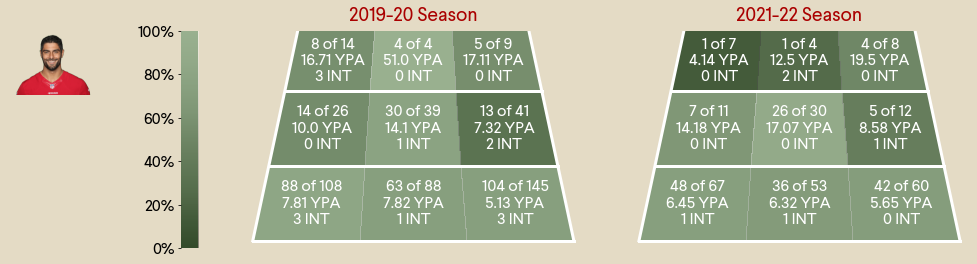

In [58]:
bg = "#e4dbc5"
grass = "#567d46"

# Plot parameters
plt.rcParams["font.family"] = "Larsseit"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = 400
plt.rcParams["text.color"] = c1

fig = plt.figure(figsize=(18, 4), facecolor=bg)
gs = fig.add_gridspec(nrows=3, ncols=4, width_ratios=[0.5, 0.05, 1, 1])

ax_colorbar = fig.add_subplot(gs[:, 1], zorder=2)
ax_field_2019 = fig.add_subplot(gs[:, 2], zorder=2)
ax_field_2021 = fig.add_subplot(gs[:, 3], zorder=2)
ax_headshot = fig.add_subplot(gs[0, 0])

ax_field_2019.set_frame_on(False)
ax_field_2021.set_frame_on(False)
ax_headshot.set_frame_on(False)
ax_colorbar.set_frame_on(False)

# Sidelines
ax_field_2019.plot([0, 0.45], [0, 3], color="w", linewidth=3, zorder=3)
ax_field_2019.plot([2.55, 3], [3, 0], color="w", linewidth=3, zorder=3)

ax_field_2021.plot([0, 0.45], [0, 3], color="w", linewidth=3, zorder=3)
ax_field_2021.plot([2.55, 3], [3, 0], color="w", linewidth=3, zorder=3)

# Major Yard Lines
ax_field_2019.plot([0, 3], [0, 0], color="w", linewidth=3, zorder=3)
ax_field_2019.plot([0.15, 2.85], [1, 1], color="w", linewidth=3, zorder=3)
ax_field_2019.plot([0.3, 2.7], [2, 2], color="w", linewidth=3, zorder=3)

ax_field_2021.plot([0, 3], [0, 0], color="w", linewidth=3, zorder=3)
ax_field_2021.plot([0.15, 2.85], [1, 1], color="w", linewidth=3, zorder=3)
ax_field_2021.plot([0.3, 2.7], [2, 2], color="w", linewidth=3, zorder=3)

# Grass
field_2019 = Polygon([[0, 0], [0.45, 3], [2.55, 3], [3, 0], [0, 0]], color=grass, transform=ax_field_2019.transData, zorder=1)
ax_field_2019.add_artist(field_2019)

field_2021 = Polygon([[0, 0], [0.45, 3], [2.55, 3], [3, 0], [0, 0]], color=grass, transform=ax_field_2021.transData, zorder=1)
ax_field_2021.add_artist(field_2021)

ax_field_2019.set_xticks([])
ax_field_2019.set_yticks([])

ax_field_2021.set_xticks([])
ax_field_2021.set_yticks([])

ax_field_2019.set_xlim([-0.1, 3.1])
ax_field_2019.set_ylim([-0.1, 2.8])

ax_field_2021.set_xlim([-0.1, 3.1])
ax_field_2021.set_ylim([-0.1, 2.8])

# Headshot
img = Image.open("jimmy_headshot.png")
ax_headshot.imshow(img)
ax_headshot.set(xticks=[], yticks=[])

ax_field_2019.pcolormesh(X, Y, Z_2019, shading="flat", cmap="Greys_r", vmin=0, vmax=1, alpha=0.4, zorder=2)
ax_field_2021.pcolormesh(X, Y, Z_2021, shading="flat", cmap="Greys_r", vmin=0, vmax=1, alpha=0.4, zorder=2)

# Annotations
annotate_dict = {
    (0, 0): [0.55, 0.5],
    (0, 1): [0.65, 1.5],
    (0, 2): [0.75, 2.4],
    (1, 0): [1.5, 0.5],
    (1, 1): [1.5, 1.5],
    (1, 2): [1.5, 2.4],
    (2, 0): [2.45, 0.5],
    (2, 1): [2.35, 1.5],
    (2, 2): [2.25, 2.4],
}

for i in range(3):
    for j in range(3):
        ax_field_2019.text(*annotate_dict[(i, j)], stats_string(df_loc_agg_2019, i, j), ha="center", va="center", color="w")
        ax_field_2021.text(*annotate_dict[(i, j)], stats_string(df_loc_agg_2021, i, j), ha="center", va="center", color="w")

# Colorbar
colorbar_bg = Polygon([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]], color=grass, transform=ax_colorbar.transAxes, zorder=1)
gradient = np.linspace(0, 1, 512).reshape(-1, 1)
gradient = np.tile(gradient, (1, 10))
ax_colorbar.add_artist(colorbar_bg)
ax_colorbar.imshow(gradient, cmap="Greys_r", aspect="auto", origin="lower", alpha=0.4, extent=[0, 1, 0, 1], zorder=2)
ax_colorbar.set(xticks=[], yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], yticklabels=["0%", "20%", "40%", "60%", "80%", "100%"])
        
# Titles
ax_field_2019.set_title("2019-20 Season", pad=10)
ax_field_2021.set_title("2021-22 Season", pad=10)

#plt.savefig("jimmy.png", dpi=500, bbox_inches="tight")
plt.show()